# Compile and Clean Data

## Import Data  
Data is stored locally, point folder variable to your local directory where all the CSV files are stored.

In [1]:
import pandas as pd
import os
folder = r"D:\WORK\FLOODNET\NYC OEM Monthly"
files = os.listdir(folder)
files = [i for i in files if not "meta" in i]
print(files)

['floodnet-nov-2020.csv', 'floodnet-may-2022.csv', 'floodnet-oct-2020.csv', 'floodnet-nov-2021.csv', 'floodnet-oct-2022.csv', 'floodnet-oct-2021.csv', 'floodnet-may-2021.csv', 'floodnet-mar-2022.csv', 'floodnet-jun-2021.csv', 'floodnet-dec-2021.csv', 'floodnet-aug-2021.csv', 'floodnet-sep-2022.csv', 'floodnet-apr-2021.csv', 'floodnet-feb-2021.csv', 'floodnet-jan-2021.csv', 'floodnet-aug-2022.csv', 'floodnet-dec-2020.csv', 'floodnet-jul-2021.csv', 'floodnet-jun-2022.csv', 'floodnet-apr-2022.csv', 'floodnet-feb-2022.csv', 'floodnet-jan-2022.csv', 'floodnet-mar-2021.csv', 'floodnet-sep-2021.csv', 'floodnet-jul-2022.csv']


## Iterate over CSV's to create an a single DF

In [2]:
df = pd.DataFrame()

for file_path in files:
    temp = pd.read_csv( os.path.join(folder,file_path) )
    temp['time'] = pd.to_datetime( temp['time'] )
    df = pd.concat( [df,temp ] )

df.sample(5)

,time,deployment_id,depth_filt_mm,depth_proc_mm
77597,2021-12-11 02:53:59.400758+00:00,mildly_calm_ibex,0.0,0.0
275013,2021-12-25 03:21:22.181372+00:00,overly_heroic_squid,0.0,0.0
331190,2021-12-28 10:25:46.073527+00:00,daily_happy_satyr,0.0,0.0
112611,2022-07-09 10:28:17.296000+00:00,total_moccasin_dolphin,0.0,0.0
528023,2022-09-28 15:53:47.443000+00:00,ugliest_cyan_elephant,0.0,0.0


In [3]:
df = df.reset_index(drop=True)

## Clean Data

### Remove NAN's if both measurments are NAN

In [4]:
df = df.dropna( subset=['depth_filt_mm','depth_proc_mm'] , axis = 0 )

In [5]:
print( "{} sensors are in the dataset".format( df['deployment_id'].nunique() ) )
df.groupby('deployment_id').size()

32 sensors are in the dataset


deployment_id
asleep_apricot_bedbug     118637
boring_olive_stingray     110443
daily_gentle_beetle       146324
daily_happy_satyr         274873
daily_mutual_gnat           6845
daily_new_falcon          571141
duly_pro_vervet           694389
duly_star_bee             163059
early_still_frog          140417
easily_cosmic_slug        166554
easily_dear_mouse         674549
evenly_divine_dingo        68693
future_aqua_wildcat        14511
gladly_mint_snail         246518
handsome_violet_leech      50967
highly_equal_doe           25086
jolly_tender_squid        104896
mainly_fond_boar          708356
mainly_whole_slug          75924
mildly_calm_ibex          138161
openly_driven_tarpon      110110
overly_heroic_squid       136246
really_vocal_puma          57269
simply_pet_joey            73556
slowly_fast_sawfly        282661
tired_red_monkey           16661
total_moccasin_dolphin    103214
ugliest_cyan_elephant      42090
vastly_saving_whale       156630
weekly_fair_dove          141

## Sample Viz

<AxesSubplot:xlabel='time', ylabel='depth_proc_mm'>

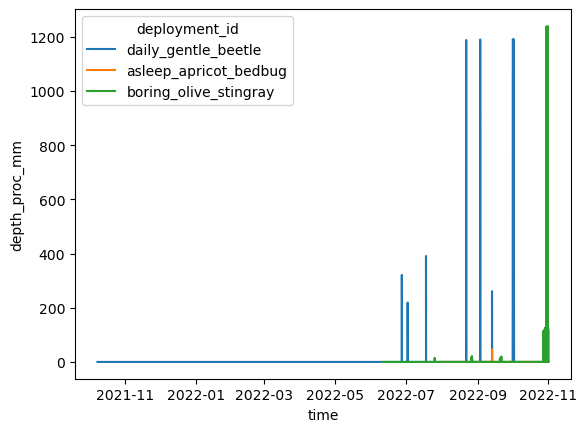

In [6]:
import seaborn as sns
#Small sample of the data just to see
sensors = ['asleep_apricot_bedbug','boring_olive_stingray','daily_gentle_beetle' ]

sns.lineplot(
    data = df[ (df['deployment_id'].isin(sensors))  ].copy() ,
    x = 'time',
    y = 'depth_proc_mm',
    hue = 'deployment_id'
)

### Weekly aggregation of flood values.  
Sensor name vs Time

<AxesSubplot:xlabel='time', ylabel='deployment_id'>

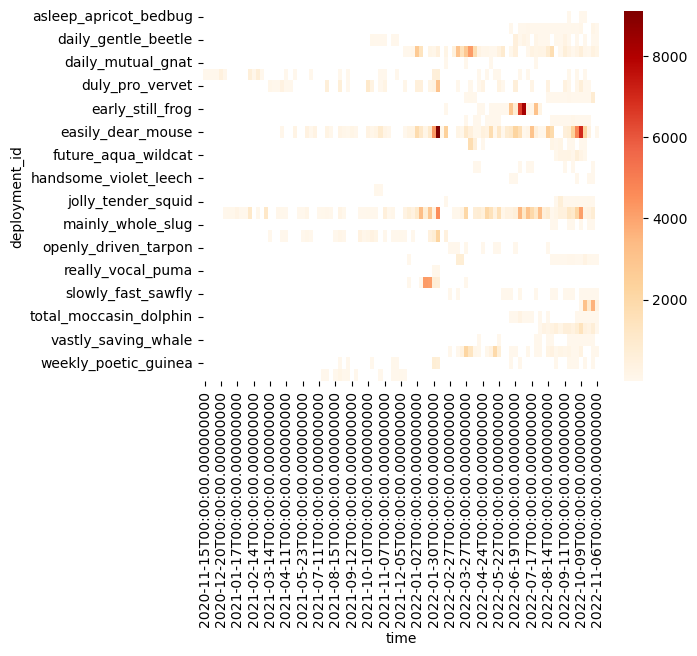

In [7]:
pt = pd.pivot_table(
    data = df[ df[['depth_filt_mm','depth_proc_mm']].sum(axis=1) > 0 ],
    index = 'deployment_id',
    columns=pd.Grouper(key='time', freq='W'),
    aggfunc=len,
    values  = 'depth_filt_mm'
)

sns.heatmap(
    data = pt,
    cmap = "OrRd"
)

### Find highest water depth per day per sensor  
Each sensor has the columns for all days in the data set. Some days will be all 0's.   
If there is no rain, the max recorded will be 0.   
Remove the fill_value to get NULL's for this.

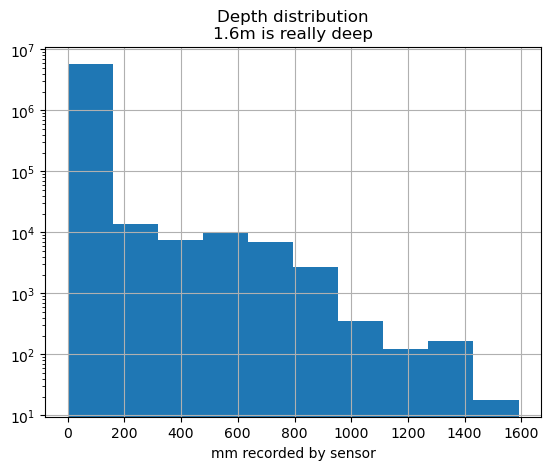

In [72]:
import matplotlib.pyplot as plt
df['depth_proc_mm'].hist()
plt.yscale('log')
plt.xlabel("mm recorded by sensor")
plt.title( 'Depth distribution\n1.6m is really deep' );


In [44]:
pt_max = pd.pivot_table(
    data = df, 
    index = 'deployment_id',
    columns=pd.Grouper(key='time', freq='1D'), # Group time column by day
    aggfunc="max", # When you group, use MAX as the aggreagation function
    values  = 'depth_proc_mm', # Which columns the values shoul be coming from,
    fill_value=0 # When the sensor is not reporting, I can assume it is 0
)

pt_max.columns = [i.strftime("%d-%m-%y") for i in pt_max.columns]

pt_max.head()


,05-10-20,06-10-20,07-10-20,08-10-20,09-10-20,10-10-20,11-10-20,12-10-20,13-10-20,14-10-20,...,22-10-22,23-10-22,24-10-22,25-10-22,26-10-22,27-10-22,28-10-22,29-10-22,30-10-22,31-10-22
deployment_id,,,,,,,,,,,,,,,,,,,,,
asleep_apricot_bedbug,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
boring_olive_stingray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,115,121,126,1236,1240
daily_gentle_beetle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
daily_happy_satyr,0,0,0,0,0,0,0,0,0,0,...,0,0,60,70,140,30,170,50,30,30
daily_mutual_gnat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Spatial Data

In [45]:
sensor_locations = pd.read_excel( r"D:\WORK\FLOODNET\Sensor Locations Directory (1).xlsx" , sheet_name= 'street sensors (live)')

sensor_locations = sensor_locations[['sensor_display_name','deployment_id','lat','lon']].copy()
sensor_locations = sensor_locations.iloc[1:]
sensor_locations

,sensor_display_name,deployment_id,lat,lon
1,BK - 4th Av/Garfield Pl,daily_gentle_beetle,40.675855,-73.983944
2,BK - 9th St/Smith St (RETIRED),widely_proud_lizard,40.673654,-73.995396
3,BK - 9th St/Smith St,overly_heroic_squid,40.673401,-73.994892
4,BK - Carroll St/4th Av,weekly_poetic_guinea,40.676281,-73.984089
5,BK - Columbia St/Bay St,vastly_saving_whale,40.673267,-74.008418
6,BK - Dwight St/King St,openly_driven_tarpon,40.676293,-74.008641
7,BK - Gerry St/Union Av,(not live yet),40.699881,-73.949919
8,BK - Henry St/Mill St,jolly_tender_squid,40.675734,-74.003396
9,BK - Hoyt St/5th St,daily_new_falcon,40.676672,-73.994591
10,BK - Lorraine St/Henry St,early_still_frog,40.673707,-74.00435


### Create Geospatial Data from Sensor locations  
You can join the above heatmap or similar data using deployment name.  
**I'd suggest using aggregated data. In Raw format this data is enourmous.**

(-8257215.733896722, -8210508.616257443, 4950474.134591787, 4989607.572848657)

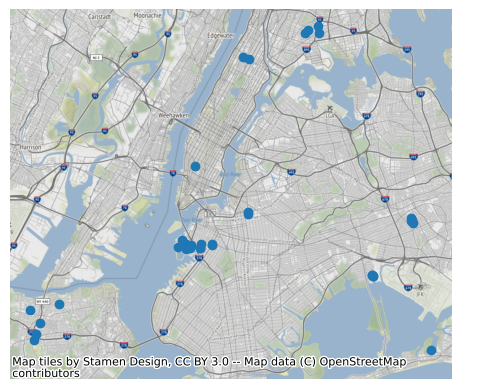

In [46]:
import geopandas as gpd
import contextily as cx

sensor_locations_geo = gpd.GeoDataFrame(
    data = sensor_locations,
    geometry=gpd.points_from_xy( sensor_locations['lon'],sensor_locations['lat'] ),
    crs = 4326
)

ax = sensor_locations_geo.to_crs(3857).plot()
cx.add_basemap( ax )
ax.axis('off')

### Join Data to Sensor Locations  
Aggregate and join to sensor location / spatial data
* Create count of all detections of  4” or more (to visualize the locations with highest flood frequency)
* Create max flood depth for each site to show where most severe flooding happens (intensity)  

**Notes:**   
I am using daily data. I'll remove the days where sum is 0 so nothing is recorded.  
Since I made pivot tables for the weekly charts, I just stacked them (make long list from wide tables).  
Making a long list by a groupby function would have been much more efficient. 

In [47]:
# 1. Remove columns where no flood was recorded. 
pt_max = pt_max[ pt_max.columns[ pt_max.sum() > 0 ] ]
pt_max.head()

,10-11-20,16-11-20,30-11-20,12-12-20,17-12-20,18-12-20,19-12-20,20-12-20,21-12-20,22-12-20,...,22-10-22,23-10-22,24-10-22,25-10-22,26-10-22,27-10-22,28-10-22,29-10-22,30-10-22,31-10-22
deployment_id,,,,,,,,,,,,,,,,,,,,,
asleep_apricot_bedbug,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
boring_olive_stingray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,115,121,126,1236,1240
daily_gentle_beetle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
daily_happy_satyr,0,0,0,0,0,0,0,0,0,0,...,0,0,60,70,140,30,170,50,30,30
daily_mutual_gnat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Find dates with more than 4" of rain and count how many  
Create count of all detections of  4” or more (to visualize the locations with highest flood frequency)  
4" = 101mm

In [69]:
# Create long list from pivot table. 
pt_max_list = pt_max.stack().reset_index()
pt_max_list.columns = ['deployment_id','date','depth']

pt_max_list = pt_max_list[ pt_max_list['depth'] > 101 ] 

wet_days = pt_max_list.groupby('deployment_id', as_index=False).size()
wet_days.head()

,deployment_id,size
0,boring_olive_stingray,5
1,daily_gentle_beetle,8
2,daily_happy_satyr,49
3,daily_new_falcon,27
4,duly_pro_vervet,30


#### Join wet days with sensor locations info

(-8256734.508608386, -8212529.881678409, 4950512.200096583, 4988808.197247956)

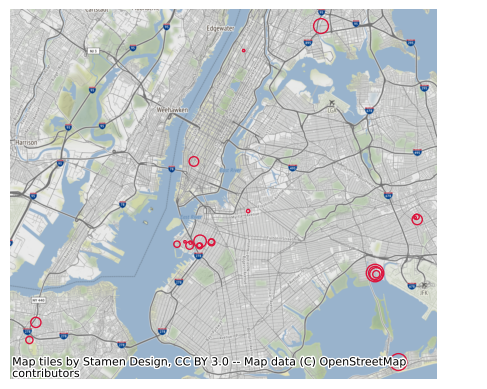

In [60]:
# sensor_meansures is the joined DB
sensor_measures = sensor_locations_geo.join( wet_days.set_index("deployment_id") , on='deployment_id' )

ax = sensor_measures.to_crs(3857).plot( markersize = sensor_measures['size']*3 , edgecolor = 'crimson' , facecolor ='none' , lw = 1 )
cx.add_basemap( ax )
ax.axis('off')

### Create max flood depth for each site to show where most severe flooding happens (intensity) 

In [68]:
# Same as before -> Create a long list from pivot table. 
pt_max_list = pt_max.stack().reset_index()
pt_max_list.columns = ['deployment_id','date','depth']

max_depth = pt_max_list.groupby('deployment_id').max() # Ask max of the id
max_depth = max_depth[max_depth['depth']  > 0 ].copy() # I don't want the sensor if no rain is recorded
max_depth

,date,depth
deployment_id,,
asleep_apricot_bedbug,31-12-21,46
boring_olive_stingray,31-12-21,1240
daily_gentle_beetle,31-12-21,1190
daily_happy_satyr,31-12-21,570
daily_new_falcon,31-12-21,486
duly_pro_vervet,31-12-21,1200
duly_star_bee,31-12-21,357
early_still_frog,31-12-21,674
easily_cosmic_slug,31-12-21,20


(-8256734.508608386, -8212529.881678409, 4950474.134591787, 4989607.572848657)

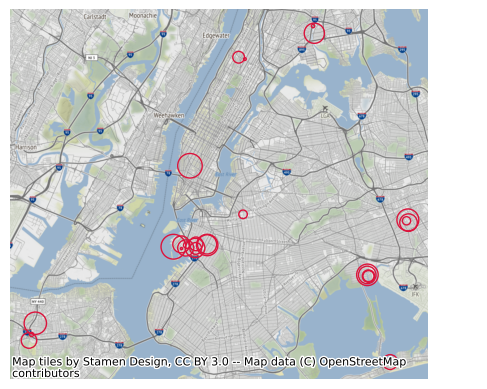

In [67]:
# sensor_meansures is the joined DB
deepest_measures = sensor_locations_geo.join( max_depth , on='deployment_id' )

ax = deepest_measures.to_crs(3857).plot( markersize = deepest_measures['depth']/5 , edgecolor = 'crimson' , facecolor ='none' , lw = 1 )
cx.add_basemap( ax )
ax.axis('off')